# Logistic Regression Handson

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore') #all the warnings will be filtered out

In [54]:
data=pd.read_csv(r'bank.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
col=data.columns.tolist()
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [56]:
data.shape

(41199, 21)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [58]:
data.describe(include='all')
# adding include = all we will get unique,top, and frequency of top value too

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41195.000000,41194,41194,41194,41195,41196,41195,41195,41196,41196,...,41196.000000,41196.000000,41196.000000,41194,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000,41196
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36556
mean,40.030319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567676,962.482547,0.173124,NaN,0.081656,93.575867,-40.504600,3.620787,5166.996405,NaN
std,10.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769751,186.893451,0.494987,NaN,1.570894,0.578999,4.629972,1.734655,72.300104,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [59]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41194     True
41195    False
41196    False
41197     True
41198    False
Length: 41199, dtype: bool

In [60]:
cor=data.corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000909,0.004682,-0.034214,0.025335,-0.000822,0.001927,0.127841,0.009857,-0.019382
duration,-0.000909,1.000000,-0.071701,-0.047580,0.020611,-0.027955,0.005284,-0.008137,-0.032868,-0.044628
campaign,0.004682,-0.071701,1.000000,0.052589,-0.079069,0.150722,0.127844,-0.013794,0.135058,0.143898
pdays,-0.034214,-0.047580,0.052589,1.000000,-0.587289,0.270960,0.078929,-0.091383,0.296777,0.372210
previous,0.025335,0.020611,-0.079069,-0.587289,1.000000,-0.420596,-0.202425,-0.051620,-0.454757,-0.501724
emp.var.rate,-0.000822,-0.027955,0.150722,0.270960,-0.420596,1.000000,0.774755,0.196261,0.972199,0.906634
cons.price.idx,0.001927,0.005284,0.127844,0.078929,-0.202425,0.774755,1.000000,0.058163,0.687329,0.520511
cons.conf.idx,0.127841,-0.008137,-0.013794,-0.091383,-0.051620,0.196261,0.058163,1.000000,0.278138,0.101603
euribor3m,0.009857,-0.032868,0.135058,0.296777,-0.454757,0.972199,0.687329,0.278138,1.000000,0.945040
nr.employed,-0.019382,-0.044628,0.143898,0.372210,-0.501724,0.906634,0.520511,0.101603,0.945040,1.000000


In [61]:
df=pd.DataFrame(data)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


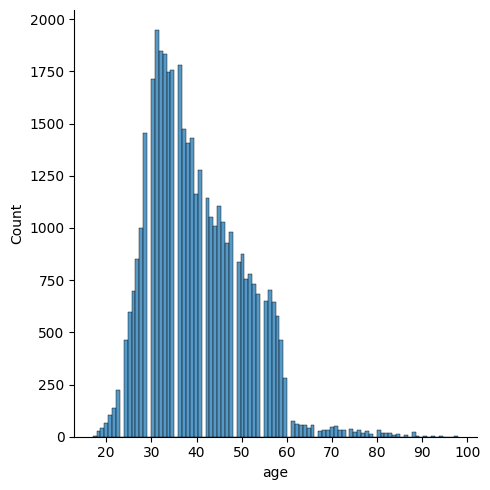

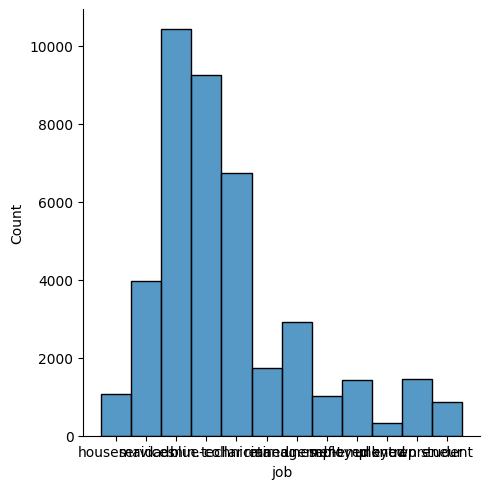

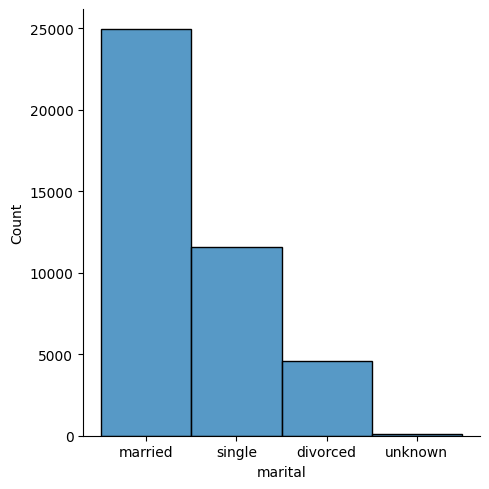

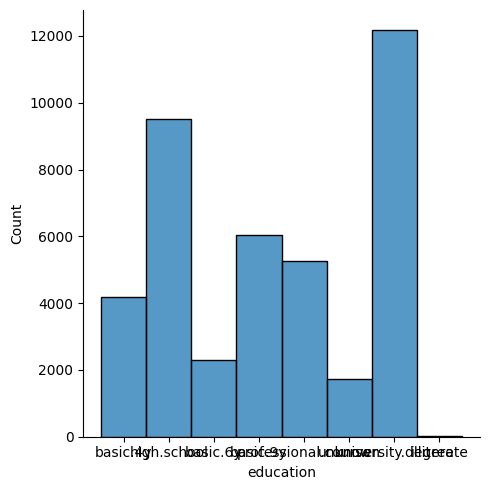

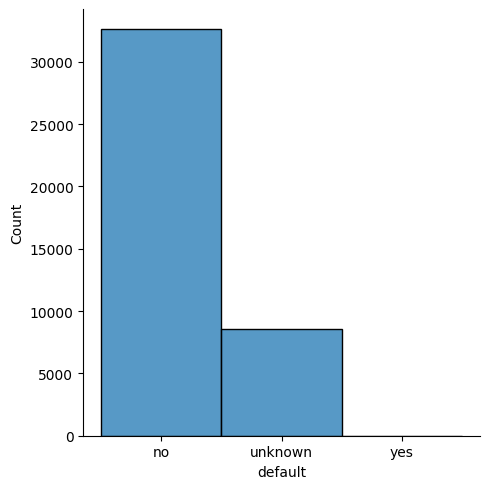

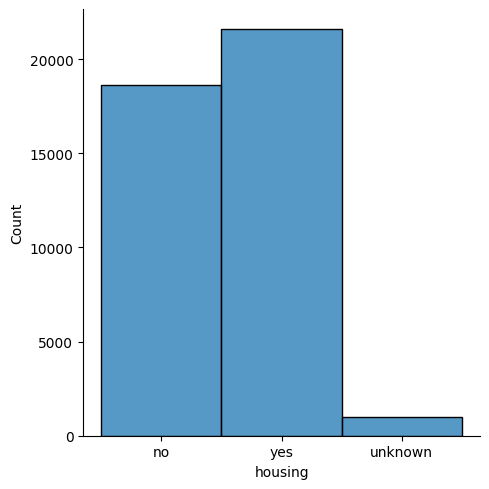

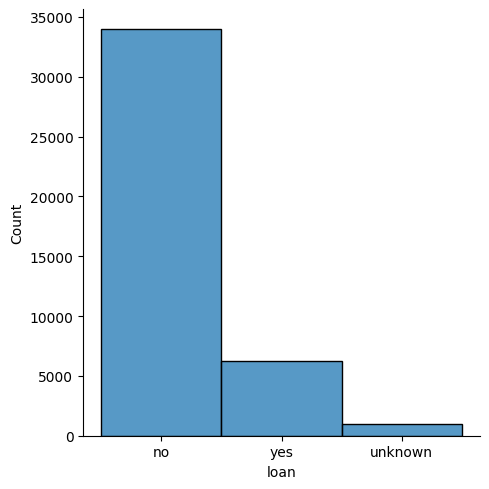

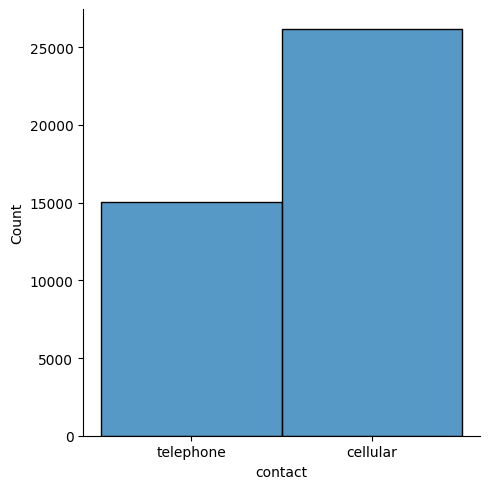

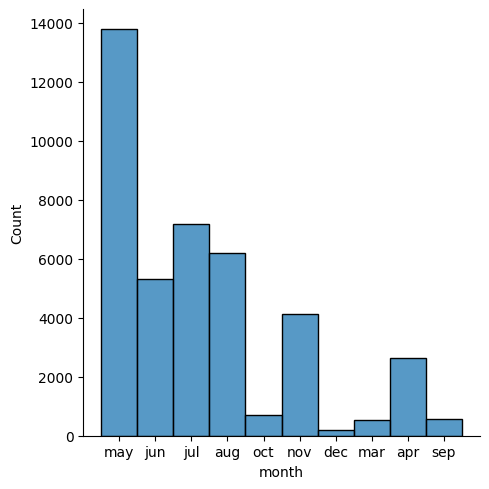

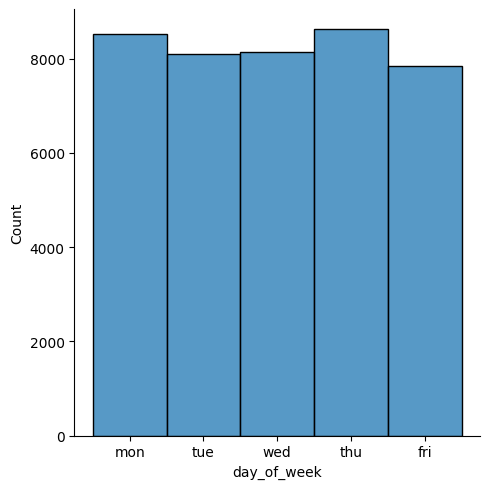

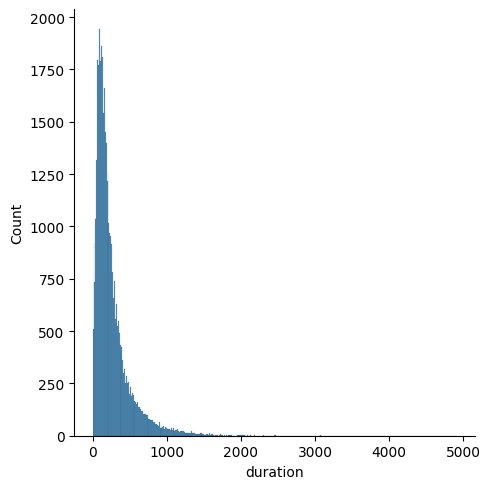

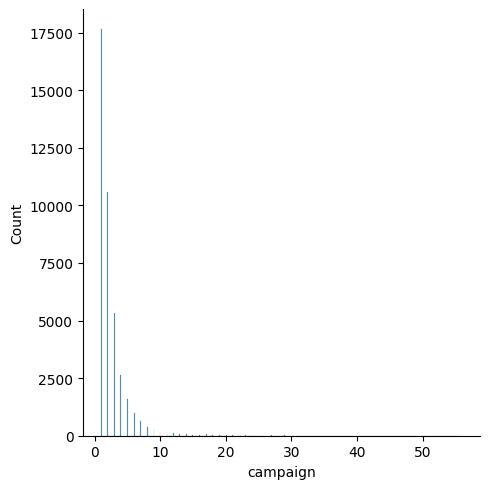

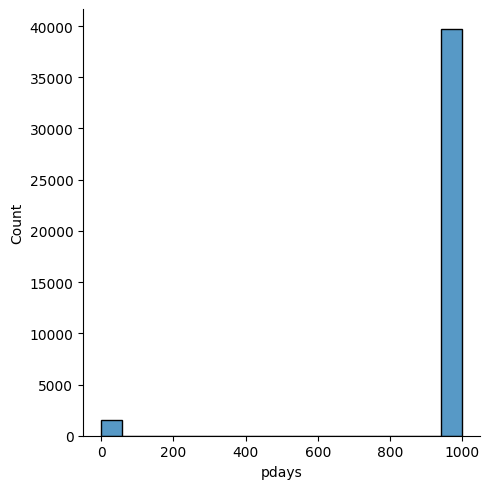

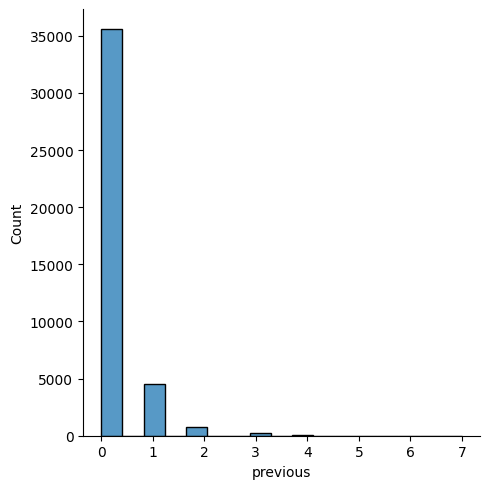

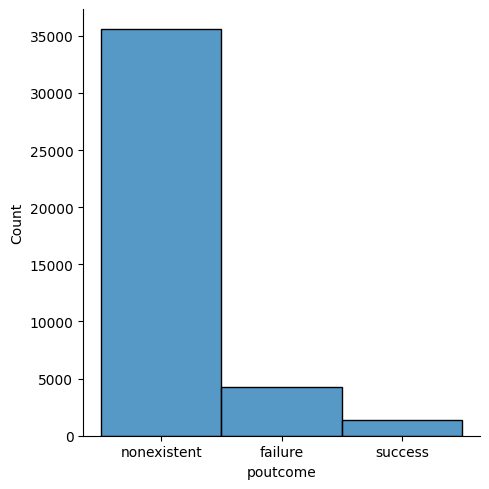

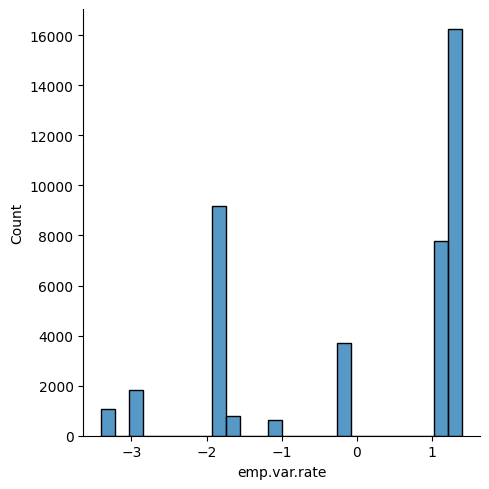

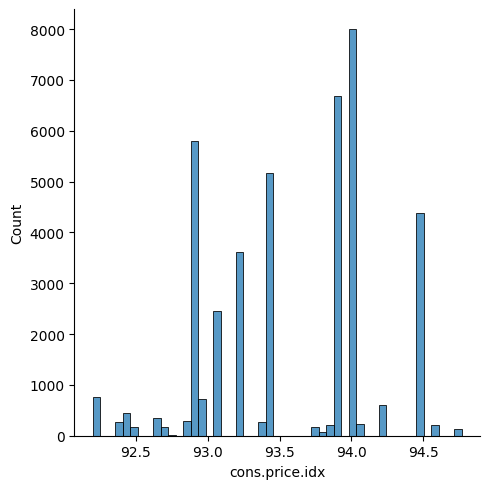

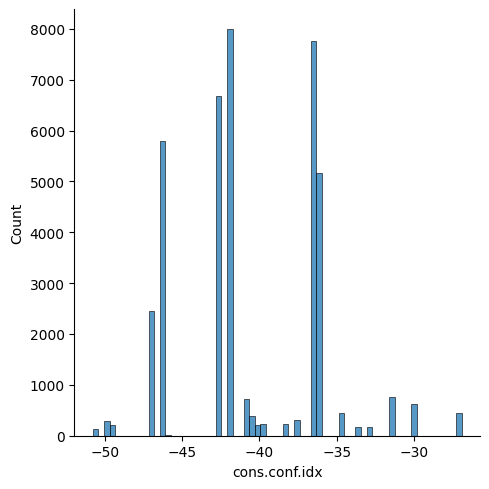

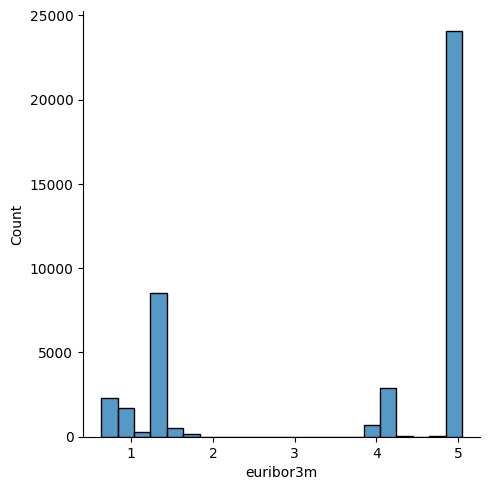

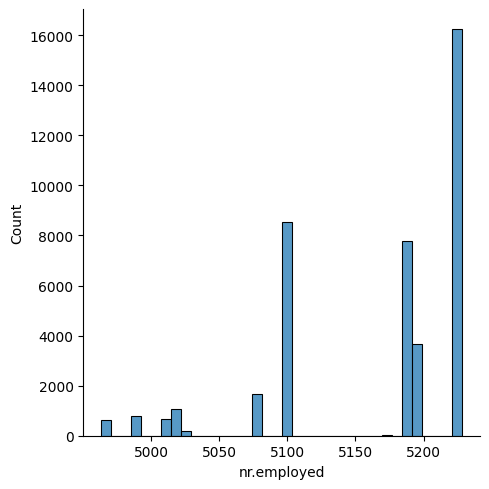

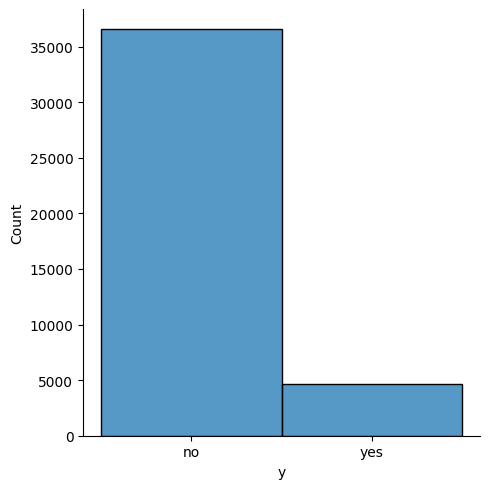

In [62]:
for c in col:
    sns.displot(df[c])
    plt.show()

In [63]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [64]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [65]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

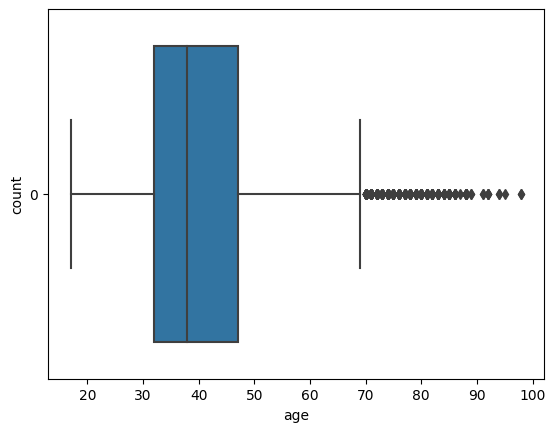

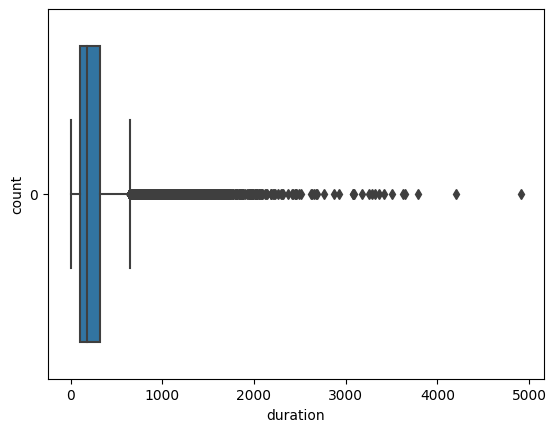

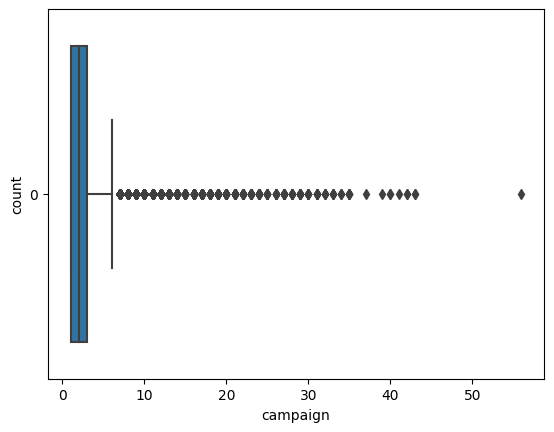

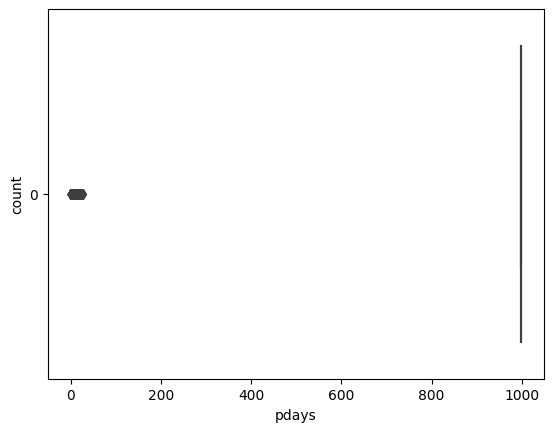

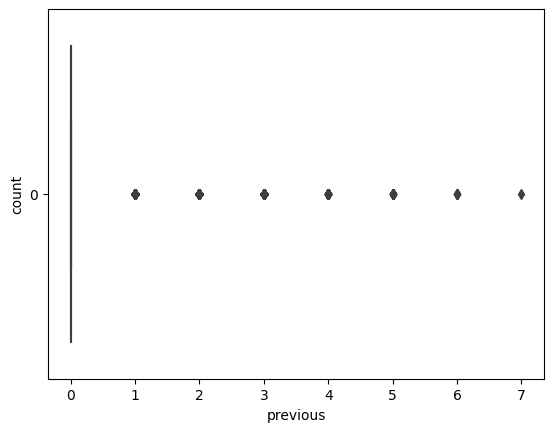

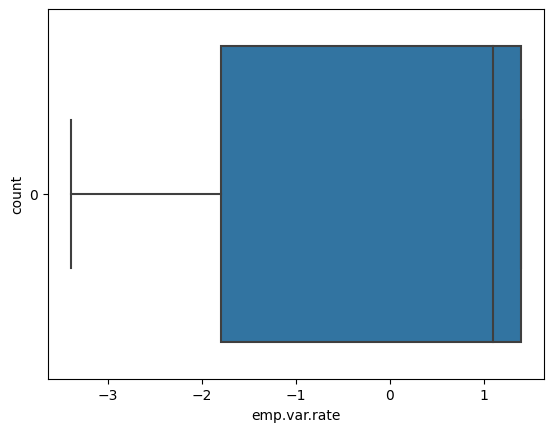

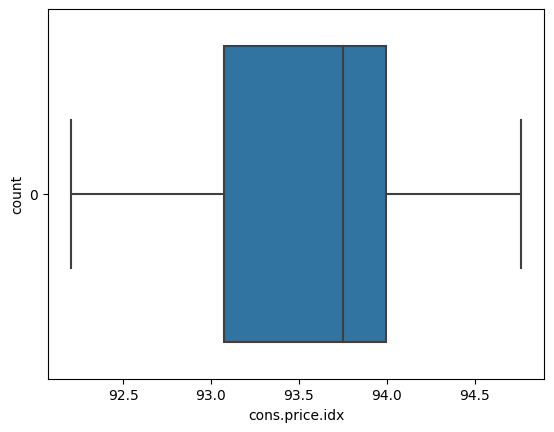

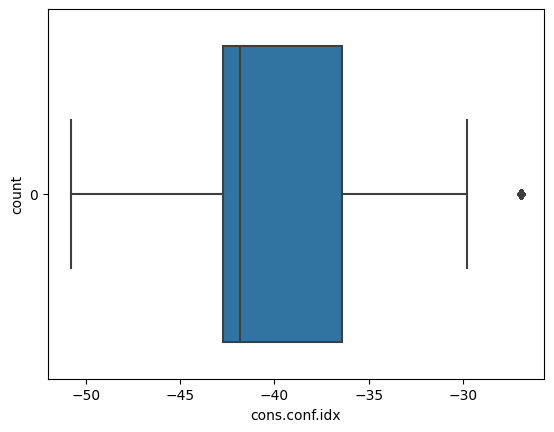

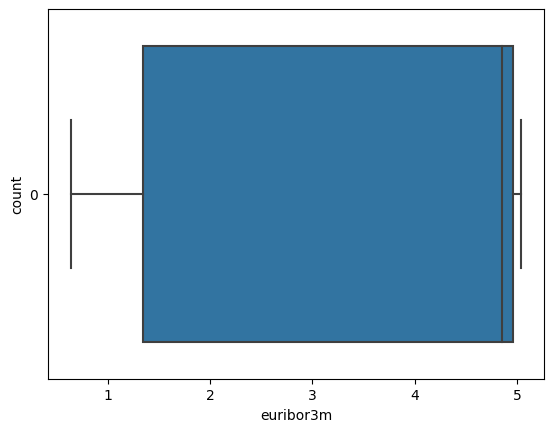

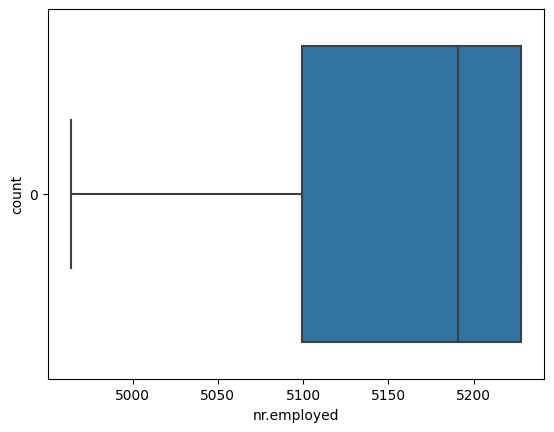

In [66]:
for c in col:
    if (data[c].dtypes=='int64'or data[c].dtypes=='float64' ):
        sns.boxplot(data[c],orient='h')
        plt.xlabel(c)
        plt.ylabel('count')
        plt.show()

In [67]:
def outlier(c):
    q1=data[c].quantile(0.25)
    q3=data[c].quantile(0.75)
    IQR=q3-q1
    u=q3+(1.5*IQR)
    l=q1-(1.5*IQR)
    return u,l

In [68]:
col1=['age', 'duration','campaign','cons.conf.idx']
for c in col :
    if (c!='pdays' and c!='previous' and data[c].dtypes=='float64'):
        u,l=outlier(c)
        df=df[((df[c]<u) & (df[c]>l))]


In [69]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


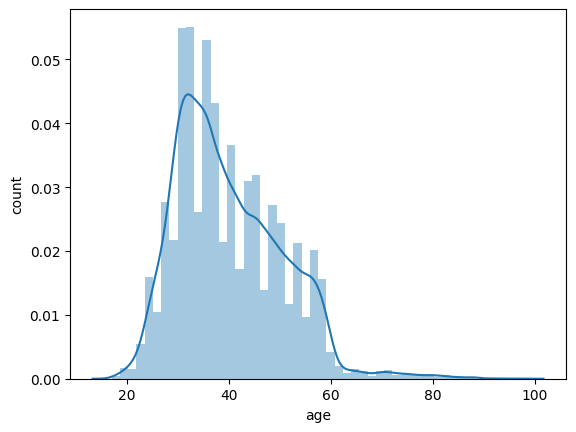

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


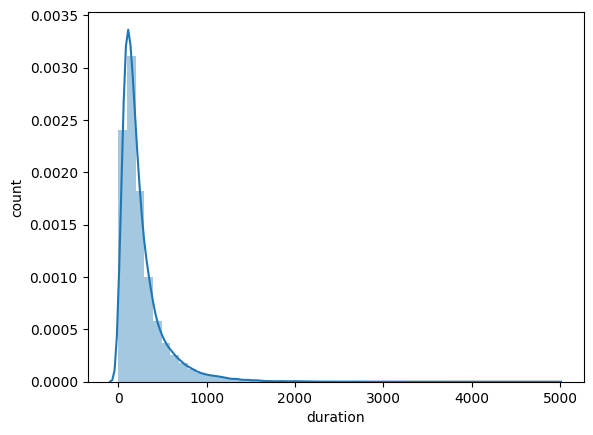

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


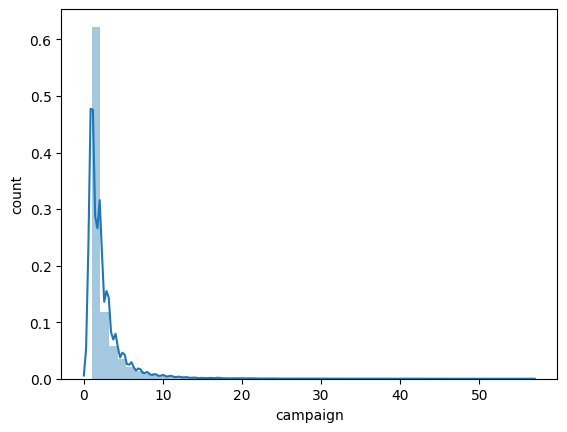

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


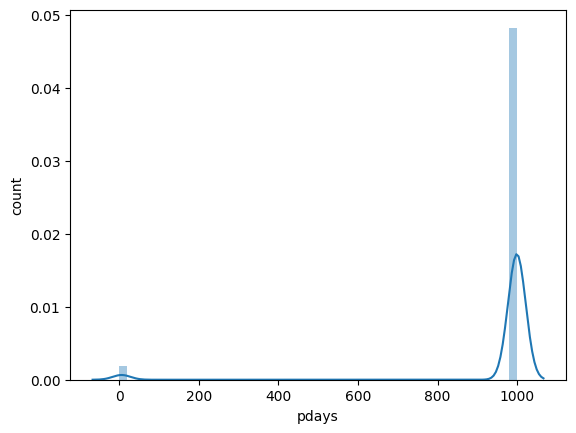

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


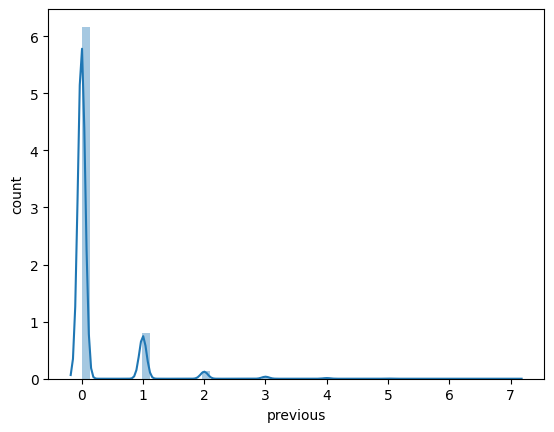

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


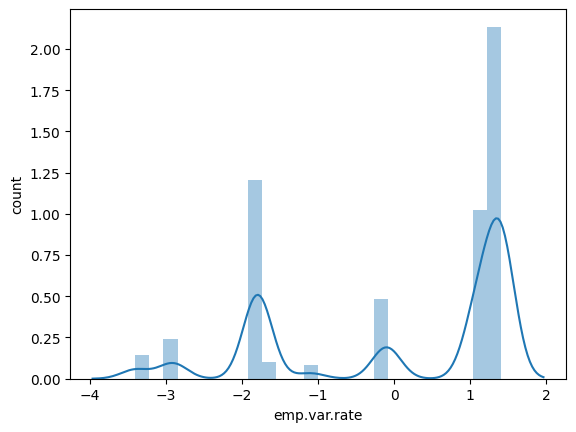

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


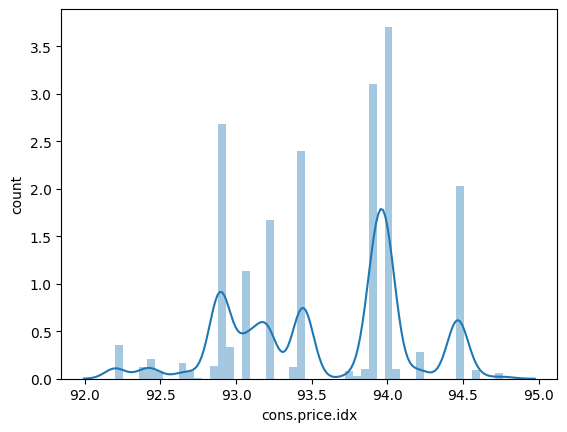

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


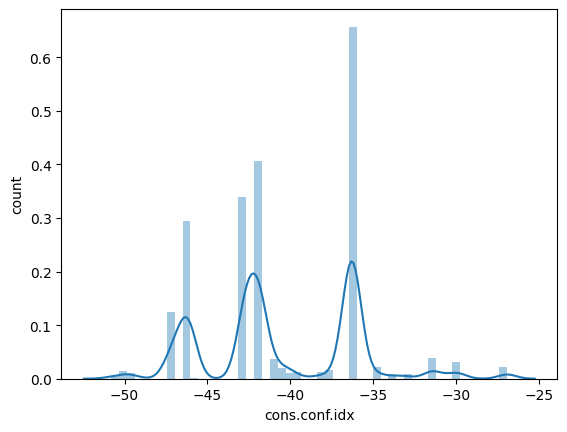

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


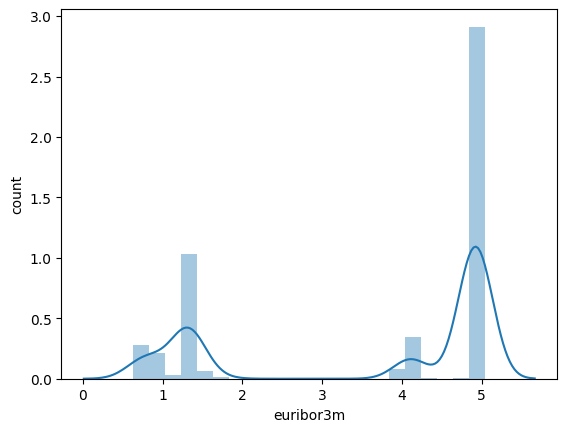

C:\Users\Hiren Kanojia\AppData\Local\Temp\ipykernel_16412\1038170278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c])


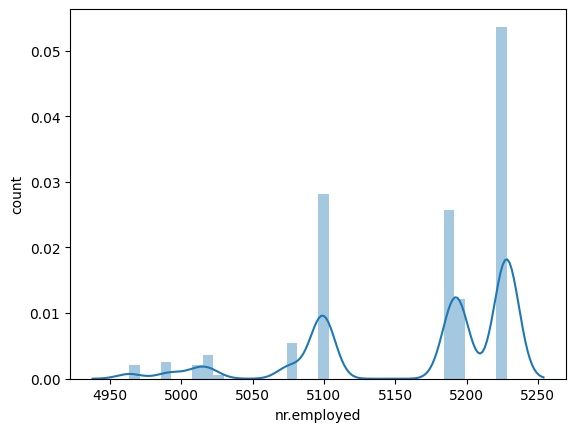

In [70]:
for c in col:
    if (data[c].dtypes=='int64'or data[c].dtypes=='float64' ):
        sns.distplot(data[c])
        plt.xlabel(c)
        plt.ylabel('count')
        plt.show()

In [71]:
data=df
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [72]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
data['y']=np.where(data['y']=='yes',1,0)
data['y']=data['y'].astype(str)
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Feature Selection

## Encoding
converting the ordinal data into its ranks so that we can find the corrilation

In [74]:
data['age']=data['age'].astype(int)

## Binning
### used to convert the num data in object or cetegory

In [75]:
# bins=[0,50,100]
# data['age'] = pd.cut[data['age'],bins]
# data['age'].astype(str)

### One Hot Encoding

In [76]:
col_list=[]
for c1 in col:
    if ((data[c1].dtype=='object') & (c1!='y')):
        col_list.append(c1)
df2 = pd.get_dummies(data[col_list], drop_first = True) # converts the categorical data into dupmmy veriables

for col in df2.columns:
    df2[col] = df2[col].astype(int)
print(col_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


## Lable Encoding
### Just assigns the numerical label to the category available

In [77]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in col_list:
    data[i] = label.fit_transform(data[i])

In [78]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


# Multicolinearity Analysis
### we cant find the intercorelation between multiple features using the corelation. So, we use Multicolinearity Analysis to find them.

## VIF

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,22.047823
1,job,2.103485
2,marital,5.698389
3,education,4.563359
4,default,1.410570
5,housing,2.214424
6,loan,1.207679
7,contact,2.948431
8,month,6.664005
9,day_of_week,3.103297


In [81]:
data = data.drop(['nr.employed'], axis = 1)

In [82]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,22.041431
1,job,2.103255
2,marital,5.697451
3,education,4.561746
4,default,1.407893
5,housing,2.214086
6,loan,1.207637
7,contact,2.447136
8,month,5.756487
9,day_of_week,3.102492


In [83]:
data = data.drop(['cons.price.idx'], axis = 1)

In [84]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,20.920587
1,job,2.097831
2,marital,5.550782
3,education,4.506274
4,default,1.407854
5,housing,2.212454
6,loan,1.207036
7,contact,2.348346
8,month,5.699567
9,day_of_week,3.087914


In [85]:
data = data.drop(['pdays'], axis = 1)

In [86]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,20.092974
1,job,2.094451
2,marital,5.431177
3,education,4.453001
4,default,1.407757
5,housing,2.208809
6,loan,1.206902
7,contact,2.273204
8,month,5.637792
9,day_of_week,3.075226


In [87]:
data = data.drop(['euribor3m'], axis = 1)

In [88]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,17.153949
1,job,2.088453
2,marital,5.231053
3,education,4.295984
4,default,1.407388
5,housing,2.201015
6,loan,1.206706
7,contact,2.265063
8,month,5.243060
9,day_of_week,3.034813


In [89]:
data = data.drop(['cons.conf.idx'], axis = 1)

In [90]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,11.092382
1,job,2.079213
2,marital,4.382542
3,education,4.200023
4,default,1.406384
5,housing,2.165117
6,loan,1.203565
7,contact,2.240835
8,month,4.852903
9,day_of_week,2.971987


In [91]:
data = data.drop(['poutcome'], axis = 1)

In [93]:
col_list=[]
for col in data.columns:
    if (data[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)

        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,9.491512
1,job,2.074425
2,marital,4.154104
3,education,4.126828
4,default,1.405872
5,housing,2.159211
6,loan,1.203180
7,contact,2.230091
8,month,4.840255
9,day_of_week,2.947299


In [94]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,56,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,57,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,37,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,40,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,56,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,29,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,46,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,56,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


# Model Building

In [105]:
R=[]
for c in data.columns:
    if c!='y':
        R.append(c)
x=data[R]
y=data['y']

In [106]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,56,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,57,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,37,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,40,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,56,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,29,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,46,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,56,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [107]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=0)
# or we can use train_size for alocating  desired the train size

In [108]:
y_train

6266     0
3416     0
1254     0
7212     0
10462    0
        ..
24976    0
38057    1
36134    1
25494    0
3019     0
Name: y, Length: 25707, dtype: object

In [109]:
pd.DataFrame(x_train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
6266,34,1,1,2,0,0,2,1,6,3,100.0,2.0,0.0,1.1
3416,53,0,0,6,0,2,2,1,6,2,172.0,2.0,0.0,1.1
1254,32,9,1,6,0,0,2,1,6,2,141.0,1.0,0.0,1.1
7212,37,1,0,2,1,2,0,1,6,2,219.0,3.0,0.0,1.1
10462,36,1,2,6,1,0,0,1,4,1,323.0,2.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24976,49,7,1,3,0,0,0,0,7,3,48.0,1.0,1.0,-0.1
38057,31,0,2,3,0,2,0,0,9,0,210.0,1.0,0.0,-3.4
36134,50,0,0,6,0,2,2,0,6,4,155.0,3.0,0.0,-1.8
25494,32,10,0,3,0,0,0,0,7,4,194.0,1.0,0.0,-0.1


In [110]:
pd.DataFrame(x_test)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
9031,37,0,1,2,0,2,0,1,4,2,209.0,3.0,0.0,1.4
2901,36,7,1,1,0,0,0,1,6,4,80.0,1.0,0.0,1.1
24584,46,9,1,3,0,2,0,0,7,1,569.0,1.0,0.0,-0.1
764,38,9,1,5,0,0,0,1,6,4,479.0,2.0,0.0,1.1
22519,33,0,1,6,0,2,0,0,1,0,64.0,1.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11225,24,9,1,5,0,0,0,1,4,2,93.0,2.0,0.0,1.4
38056,38,0,2,3,0,2,0,0,9,0,113.0,1.0,1.0,-3.4
9505,40,7,1,1,1,2,0,1,4,1,52.0,1.0,0.0,1.4
29754,37,0,1,3,0,0,0,0,0,1,131.0,3.0,0.0,-1.8


In [111]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [112]:
log.fit(x_train,y_train)

C:\Users\Hiren Kanojia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
test_pred = log.predict(x_test)
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [115]:
pred=pd.DataFrame()
pred['y_test']=y_test
pred['y_pred']=test_pred
pred

,y_test,y_pred
9031,0,0
2901,0,0
24584,0,0
764,0,0
22519,0,0
...,...,...
11225,0,0
38056,0,0
9505,0,0
29754,0,0


In [117]:
from sklearn.metrics import accuracy_score as acs
acs(y_test,test_pred)

0.9212368728121354

In [118]:
from sklearn.metrics import confusion_matrix

In [122]:
c1=confusion_matrix(y_test,test_pred)

In [123]:
c1

array([[7753,  153],
       [ 522,  142]], dtype=int64)